# Portafolio de Estrategias

¿Que es un portafolio de Estrategias?

¿Como se construye?

¿Para que sirve?



¿Cual es la principal ventaja contra un portafolio de acciones?


# Analisis Combinatorio

* Combinaciones (No importa el orden  AB es la misma combinacion que BA)
    * Con repeticion
    * Sin repeticion
* Permutaciones (Importa el orden  AB es una permutacion y BA es otra permutacion )

### Combinatoria

Combinaciones de "n" elelmentos tomados de a "i"

$$ \large  C \binom{n}{i} = \frac{n!}{i! (n-i)!} $$

In [1]:
import math

# Combinaciones de 10 tomados de a 2
c = math.factorial(10) / (math.factorial(2)*math.factorial(10-2))

c

45.0

### Algos de Combinatoria

In [2]:
numeros = [i for i in range(10)]

combinaciones = []
for i in range(len(numeros)):
    for j in range(len(numeros)):
        if j>i:
            combinaciones.append([numeros[i],numeros[j]])

print(len(combinaciones), '\n\n', combinaciones)

45 

 [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [5, 6], [5, 7], [5, 8], [5, 9], [6, 7], [6, 8], [6, 9], [7, 8], [7, 9], [8, 9]]


### Y para que demonios voy a querer algos de combinatoria?

Escucho ideas...

* Screener
* Clusterizacion
* Parametrizaciones
* Combinaciones de indicadores o ratios

* Combinaciones de conjuntos discretizables

In [3]:
activos = ["GGAL", "PAM","TGS","YPF","EDN"]

combinaciones = []
for i in range(len(activos)):
    for j in range(len(activos)):
        if j>i:
            combinaciones.append([activos[i],activos[j]])
combinaciones

[['GGAL', 'PAM'],
 ['GGAL', 'TGS'],
 ['GGAL', 'YPF'],
 ['GGAL', 'EDN'],
 ['PAM', 'TGS'],
 ['PAM', 'YPF'],
 ['PAM', 'EDN'],
 ['TGS', 'YPF'],
 ['TGS', 'EDN'],
 ['YPF', 'EDN']]

In [4]:
combinaciones

[['GGAL', 'PAM'],
 ['GGAL', 'TGS'],
 ['GGAL', 'YPF'],
 ['GGAL', 'EDN'],
 ['PAM', 'TGS'],
 ['PAM', 'YPF'],
 ['PAM', 'EDN'],
 ['TGS', 'YPF'],
 ['TGS', 'EDN'],
 ['YPF', 'EDN']]

# MPT

## Algunas cositas previas

### Importacion de datos 

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np

data = yf.download(['AMZN','TSLA','NFLX'], start='2000-01-01', end='2021-01-01')['Adj Close']
data.head()

[*********************100%***********************]  3 of 3 downloaded


,AMZN,NFLX,TSLA
Date,,,
2000-01-03,89.38,NaN,NaN
2000-01-04,81.94,NaN,NaN
2000-01-05,69.75,NaN,NaN
2000-01-06,65.56,NaN,NaN
2000-01-07,69.56,NaN,NaN


### Filtrado de los ceros

In [6]:
lista = [0,12,13,14]
lista2 = [1,2,3,4]
df = pd.DataFrame(list(zip(lista,lista2)), columns=['a','b'])
df

,a,b
0,0,1
1,12,2
2,13,3
3,14,4


In [7]:
df_ceros = df.loc[(df==0).any(axis=1)]
df_ceros

,a,b
0,0,1


In [8]:
df_sin_ceros = df.loc[~(df==0).any(axis=1)]
df_sin_ceros

,a,b
1,12,2
2,13,3
3,14,4


In [9]:
lista = [0,12,13,14]
lista2 = [1,2,3,4]
df = pd.DataFrame(list(zip(lista,lista2)), columns=['a','b'])
df.loc[df.a!=0]

,a,b
1,12,2
2,13,3
3,14,4


In [10]:
lista = [0,12,13,14]
lista2 = [1,2,3,4]
df = pd.DataFrame(list(zip(lista,lista2)), columns=['a','b'])

df.loc[:, (df != 0).all(axis=0)]

,b
0,1
1,2
2,3
3,4


### Retornos logaritmicos

In [11]:
retornos = np.log((data/data.shift(1)).dropna())
retornos.head()

,AMZN,NFLX,TSLA
Date,,,
2010-06-30,0.005967,-0.035447,-0.002094
2010-07-01,0.015439,0.009619,-0.083017
2010-07-02,-0.016538,-0.023895,-0.133857
2010-07-06,0.008394,0.001306,-0.176091
2010-07-07,0.030160,0.099928,-0.018809


### Ponderaciones al azar

In [12]:
np.random.seed(1)

pond = np.array(np.random.random(len(data.columns)))
pond = pond/np.sum(pond)
pond

array([3.66625362e-01, 6.33274085e-01, 1.00552749e-04])

### Explicación de MPT

https://en.wikipedia.org/wiki/Modern_portfolio_theory

$$ \Large R_{p} = \sum _{i} w_{i} R_{i}\quad $$

$$ \Large \sigma _{p}^{2}=\sum _{i}\sum _{j}w_{i}w_{j}\sigma _{ij} $$

### Cálculo de sharpe de cartera

In [13]:
r={}
r['retorno'] = np.sum( (retornos.mean() * pond * 252))
r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
r['sharpe'] = r['retorno'] / r['volatilidad'] 
r['ponderaciones'] = pond
r

{'retorno': 0.3329579442832441,
 'volatilidad': 0.3856231862947566,
 'sharpe': 0.8634282276500431,
 'ponderaciones': array([3.66625362e-01, 6.33274085e-01, 1.00552749e-04])}

In [14]:
r={}
r['retorno'] = np.dot( retornos.mean() , pond )*252
r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
r['sharpe'] = r['retorno'] / r['volatilidad'] 
r['ponderaciones'] = pond
r

{'retorno': 0.3329579442832441,
 'volatilidad': 0.3856231862947566,
 'sharpe': 0.8634282276500431,
 'ponderaciones': array([3.66625362e-01, 6.33274085e-01, 1.00552749e-04])}

### Doble producto matricial ponderaciones por mat_covarianzas

In [15]:
mat_cov = (np.random.rand(3,3)*10).round()
mat_cov

array([[3., 1., 1.],
       [2., 3., 4.],
       [5., 4., 7.]])

In [16]:
p  = [1,2,0]

pm1 = np.dot(mat_cov,p)
pm1

array([ 5.,  8., 13.])

In [17]:
pm2 = np.dot(p,pm1)
pm2

21.0

# Markowitz - I

In [18]:
import yfinance as yf
import pandas as pd

df = yf.download(['PYPL','AAPL'], start='2010-01-01', end='2021-01-01')['Adj Close']
df = df.loc[~(df==0).any(axis=1)] 
retornos = np.log((df/df.shift(1)).dropna())

[*********************100%***********************]  2 of 2 downloaded


In [19]:
datosTickers = []
for ticker in df.columns:
    d = {}
    d['ticker'] = ticker
    d['retorno'] = retornos[ticker].mean() * 252
    d['volatilidad'] = retornos[ticker].std() * (252**0.5)
    d['sharpe'] = d['retorno'] / d['volatilidad']
    datosTickers.append(d)
    
    
datosTickers = pd.DataFrame(datosTickers).set_index('ticker')
datosTickers

,retorno,volatilidad,sharpe
ticker,,,
AAPL,0.264475,0.299994,0.881600
PYPL,0.320786,0.336082,0.954486


In [20]:
q = 500
retornos = np.log((df/df.shift(1)).dropna())
carteras = [] 

for i in range(q):
    pond = np.array(np.random.random(len(df.columns)))
    pond = pond/np.sum(pond)
    r={}
    r['retorno'] = np.sum( (retornos.mean() * pond * 252))
    r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
    r['sharpe'] = r['retorno'] / r['volatilidad'] 
    r['pesos'] = pond.round(4)
    carteras.append(r)

carteras = pd.DataFrame(carteras)
carteras

,retorno,volatilidad,sharpe,pesos
0,0.310151,0.309671,1.001550,"[0.1889, 0.8111]"
1,0.318576,0.330030,0.965295,"[0.0392, 0.9608]"
2,0.296709,0.287774,1.031050,"[0.4276, 0.5724]"
3,0.297431,0.288576,1.030686,"[0.4147, 0.5853]"
4,0.295297,0.286336,1.031293,"[0.4527, 0.5473]"
...,...,...,...,...
495,0.292834,0.284252,1.030189,"[0.4964, 0.5036]"
496,0.281922,0.281697,1.000800,"[0.6902, 0.3098]"
497,0.314357,0.319271,0.984611,"[0.1142, 0.8858]"
498,0.317927,0.328305,0.968389,"[0.0508, 0.9492]"


In [21]:
optimo = carteras.loc[carteras.sharpe.idxmax()]
mejor_port = carteras.iloc[carteras.sharpe.idxmax()]['pesos']

datosTickers['ponderacion_optima'] = mejor_port
datosTickers

,retorno,volatilidad,sharpe,ponderacion_optima
ticker,,,,
AAPL,0.264475,0.299994,0.881600,0.45
PYPL,0.320786,0.336082,0.954486,0.55


In [22]:
optimo

retorno            0.295444
volatilidad        0.286478
sharpe               1.0313
pesos          [0.45, 0.55]
Name: 111, dtype: object

In [23]:
mejor_port

array([0.45, 0.55])

In [24]:
datosTickers

,retorno,volatilidad,sharpe,ponderacion_optima
ticker,,,,
AAPL,0.264475,0.299994,0.881600,0.45
PYPL,0.320786,0.336082,0.954486,0.55


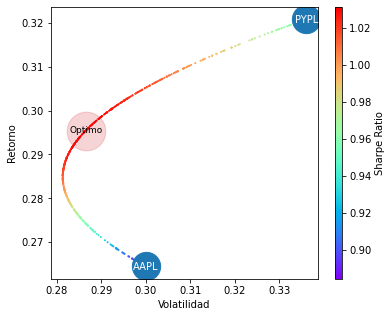

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(carteras.volatilidad, carteras.retorno, c=carteras.sharpe, s=1, cmap='rainbow')
plt.colorbar(label='Sharpe Ratio', aspect=40)
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.scatter(optimo.volatilidad, optimo.retorno,c='tab:red', alpha=0.2, s=1500) 
plt.text(optimo.volatilidad, optimo.retorno, 'Optimo', fontsize=9, c='k', ha='center', va='center') 

for ticker in df.columns:
    vol = datosTickers.loc[ticker,'volatilidad'] 
    ret = datosTickers.loc[ticker,'retorno'] 
    plt.scatter(vol, ret,  c='tab:blue', s=800) 
    plt.text(vol, ret, ticker, c='w', ha='center', va='center') 

In [26]:
import yfinance as yf, numpy as np, pandas as pd, matplotlib.pyplot as plt

def markowitz(data, q=1000):
    retornos = np.log((data/data.shift(1)).dropna())
    carteras, datosTickers = [] , []
    
    for i in range(q):
        pond = np.array(np.random.random(len(data.columns)))
        pond = pond/np.sum(pond)
        r={}
        r['retorno'] = np.sum( (retornos.mean() * pond * 252))
        r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
        r['sharpe'] = r['retorno'] / r['volatilidad'] 
        r['pesos'] =  pond.round(4)
        carteras.append(r)
    
    for ticker in data.columns:
        d = {}
        d['ticker'] = ticker
        d['retorno'] = retornos[ticker].mean() * 252
        d['volatilidad'] = retornos[ticker].std() * (252**0.5)
        d['sharpe'] = d['retorno'] / d['volatilidad']
        datosTickers.append(d)

    datosTickers = pd.DataFrame(datosTickers).set_index('ticker')    
    carteras = pd.DataFrame(carteras)

    optimo = carteras.loc[carteras.sharpe.idxmax()]
    mejor_port = carteras.iloc[carteras.sharpe.idxmax()]['pesos']
    datosTickers['ponderacion_optima'] = mejor_port

    plt.figure(figsize=(6,5))
    plt.scatter(carteras.volatilidad, carteras.retorno, c=carteras.sharpe, s=1, cmap='rainbow')
    plt.colorbar(label='Sharpe Ratio', aspect=40)
    plt.xlabel('Volatilidad')
    plt.ylabel('Retorno')
    plt.scatter(optimo.volatilidad, optimo.retorno,c='tab:red', alpha=0.2, s=1500) 
    plt.text(optimo.volatilidad, optimo.retorno, 'Optimo', fontsize=9, c='k', ha='center', va='center') 
       
    for ticker in data.columns:
        vol = datosTickers.loc[ticker,'volatilidad'] 
        ret = datosTickers.loc[ticker,'retorno'] 
        plt.scatter(vol, ret,  c='tab:blue', s=800) 
        plt.text(vol, ret, ticker, c='w', ha='center', va='center') 
    
    return(datosTickers.round(3), optimo)

[*********************100%***********************]  2 of 2 downloaded
        retorno  volatilidad  sharpe  ponderacion_optima
ticker                                                  
AAPL      0.264        0.300   0.882                0.45
PYPL      0.321        0.336   0.954                0.55

Portafolio Optimo:
retorno                0.295416
volatilidad            0.286451
sharpe                   1.0313
pesos          [0.4505, 0.5495]
Name: 142, dtype: object


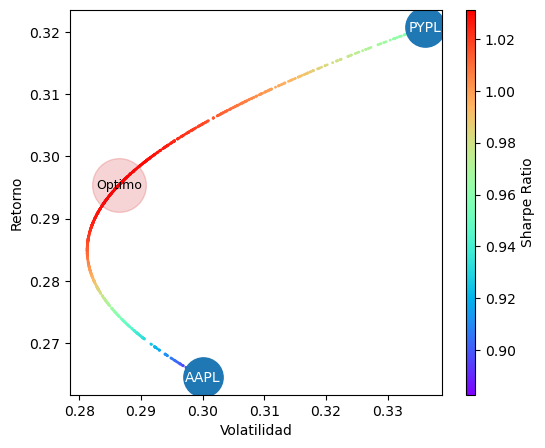

In [27]:
plt.style.use('default')
df = yf.download(['PYPL','AAPL'], start='2010-01-01', end='2021-01-01')['Adj Close']
df = df.loc[~(df==0).any(axis=1)] 
pond, optimo = markowitz(df, q=1000)
print(pond, '\n\nPortafolio Optimo:\n',optimo, sep='')

# Markowitz - Optimo varios activos

Buscamos el portafolio optimo entre muchos portafolios posibles

In [28]:
import yfinance as yf, numpy as np, pandas as pd, random, tqdm


# Obtengo el listado de tickers del sp500
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = list(sp500.Symbol)
sp500_tickers = [e for e in sp500_tickers if e not in ('BRK.B','BF.B')]


# Obtengo todos los historicos
data_sp500 = yf.download(sp500_tickers, start='2010-01-01', end='2021-01-01')['Adj Close']

# Para evitar tickers con poco historial
conteo = pd.DataFrame(data_sp500.count(), columns=['Q'])
sp500_tickers = list(conteo.loc[conteo.Q>1500].index)


pd.options.display.max_columns = 6
pd.options.display.max_rows = 10
pd.options.display.width = 800 
print(data_sp500)

[*********************100%***********************]  503 of 503 downloaded
                 A    AAL     AAP  ...    ZBRA   ZION     ZTS
Date                               ...                       
2010-01-04   20.62   4.50   39.09  ...   28.67  11.83     NaN
2010-01-05   20.39   5.01   38.86  ...   28.62  12.24     NaN
2010-01-06   20.32   4.80   39.20  ...   28.40  13.31     NaN
2010-01-07   20.29   4.94   39.19  ...   27.69  14.80     NaN
2010-01-08   20.29   4.85   39.35  ...   27.60  14.56     NaN
...            ...    ...     ...  ...     ...    ...     ...
2020-09-24   96.34  11.77  146.71  ...  250.67  28.22  157.98
2020-09-25   97.69  12.29  149.41  ...  257.46  28.45  160.84
2020-09-28   99.51  12.76  153.39  ...  260.56  29.38  161.32
2020-09-29  100.22  12.25  151.71  ...  258.92  28.97  162.48
2020-09-30  100.94  12.29  153.50  ...  252.46  29.22  165.37

[2706 rows x 503 columns]


In [29]:
def simular(tickers, q):
    
    n_stocks = 3
    datos = []
    for i in tqdm.tqdm(range(q)):
    
        muestra = data_sp500[random.sample(tickers, n_stocks)]
        
        # Filtro sin ceros
        muestra = muestra.loc[:, (muestra != 0).all(axis=0)]
        retornos = np.log((muestra/muestra.shift(1)).dropna())
        pond = np.array(np.random.random(len(muestra.columns)))
        pond = pond/np.sum(pond)
        
        # If para evitar activos sin dataFeed
        if len(retornos):    
            r={}
            r['activos'] = list(muestra.columns)
            r['pesos'] = pond.round(3)
            r['retorno'] = np.sum( (retornos.mean() * pond * 252))
            r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
            r['sharpe'] = round(r['retorno'] / r['volatilidad'],3) 
            datos.append(r)
    
    df = pd.DataFrame(datos).sort_values('sharpe', ascending=False)

    return df

In [30]:
portfolios = simular(sp500_tickers, 10000)
print('\n',portfolios.head(10))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:06<00:00, 150.27it/s]


                  activos                  pesos   retorno  volatilidad  sharpe
8875   [DPZ, FISV, EXPD]  [0.699, 0.222, 0.079]  0.316684     0.239597   1.322
3751      [GOOG, DPZ, V]   [0.108, 0.47, 0.422]  0.287808     0.218058   1.320
1531       [JCI, V, DPZ]  [0.191, 0.327, 0.481]  0.278641     0.211671   1.316
4152    [NOW, NVDA, WST]  [0.353, 0.412, 0.235]  0.383735     0.293462   1.308
337     [NVDA, APD, ZTS]  [0.755, 0.082, 0.163]  0.430552     0.338724   1.271
951     [MMC, MKTX, HRL]  [0.339, 0.394, 0.267]  0.244370     0.193664   1.262
5524    [WLTW, DPZ, LLY]  [0.352, 0.344, 0.304]  0.225150     0.179352   1.255
7921    [COST, WST, AZO]  [0.542, 0.245, 0.213]  0.205808     0.165795   1.241
1362  [ADBE, NDAQ, FANG]  [0.738, 0.233, 0.029]  0.307369     0.250540   1.227
7999   [TTWO, CDW, DXCM]  [0.274, 0.375, 0.351]  0.331366     0.270733   1.224


In [31]:
import sys

def simular2(tickers, q):
    
    n_stocks = 3
    datos = []

    with tqdm.tqdm(total=q, file=sys.stdout) as pbar:
        for i in range(q):
            pbar.update()

            muestra = data_sp500[random.sample(tickers, n_stocks)]

            # Filtro sin ceros
            muestra = muestra.loc[:, (muestra != 0).all(axis=0)]
            retornos = np.log((muestra/muestra.shift(1)).dropna())
            pond = np.array(np.random.random(len(muestra.columns)))
            pond = pond/np.sum(pond)

            # If para evitar activos sin dataFeed
            if len(retornos):    
                r={}
                r['activos'] = list(muestra.columns)
                r['pesos'] = pond.round(3)
                r['retorno'] = np.sum( (retornos.mean() * pond * 252))
                r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
                r['sharpe'] = round(r['retorno'] / r['volatilidad'],3) 
                datos.append(r)
    
    df = pd.DataFrame(datos).sort_values('sharpe', ascending=False)

    return df

In [32]:
portfolios = simular2(sp500_tickers, 10000)
print('\n',portfolios.head(10))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:15<00:00, 132.43it/s]

                 activos                  pesos   retorno  volatilidad  sharpe
9609   [DPZ, AZO, ODFL]   [0.298, 0.492, 0.21]  0.262733     0.196319   1.338
1126  [SHW, MKTX, INTU]  [0.288, 0.483, 0.229]  0.283946     0.227549   1.248
6700  [PSX, CHTR, NVDA]  [0.107, 0.468, 0.425]  0.319079     0.259787   1.228
3676   [MCHP, TJX, DPZ]   [0.231, 0.31, 0.458]  0.267724     0.218677   1.224
1849   [MSCI, CDW, RTX]  [0.933, 0.046, 0.021]  0.328054     0.268640   1.221
9486    [DPZ, KLAC, EW]  [0.413, 0.192, 0.394]  0.283613     0.232335   1.221
5065  [ORLY, MSCI, ZTS]  [0.318, 0.524, 0.158]  0.266488     0.218405   1.220
2847    [DPZ, TXN, CAG]   [0.457, 0.46, 0.083]  0.265781     0.218608   1.216
1878   [CBOE, DPZ, FIS]  [0.102, 0.411, 0.486]  0.244892     0.201979   1.212
6113   [DPZ, BKNG, KMI]  [0.825, 0.137, 0.038]  0.306915     0.254688   1.205


# Markowitz - Optimizcion x Optimo varios activos

Optimmizamos las iteraciones para encontrar un optimo mas rapido

In [33]:
def simular3(tickers, q):
    n_stocks = 3
    datos = []
    for i in range(q):
    
        muestra = data_sp500[random.sample(tickers, n_stocks)]
        
        # Filtro sin ceros
        muestra = muestra.loc[:, (muestra != 0).all(axis=0)]
        retornos = np.log((muestra/muestra.shift(1)).dropna())
        pond = np.array(np.random.random(len(muestra.columns)))
        pond = pond/np.sum(pond)
        
        # If para evitar activos sin dataFeed
        if len(retornos):    
            r={}
            r['activos'] = list(muestra.columns)
            r['pesos'] = pond.round(3)
            r['retorno'] = np.sum( (retornos.mean() * pond * 252))
            r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
            r['sharpe'] = round(r['retorno'] / r['volatilidad'],3) 
            datos.append(r)
            
    df = pd.DataFrame(datos).sort_values('sharpe', ascending=False)
    return df

In [34]:
%%time
q_inicial = 1500
lista_tickers = sp500_tickers
portfolios = simular3(lista_tickers, q_inicial)

best = pd.DataFrame()
for i in tqdm.tqdm(range(10)):
    top = portfolios.iloc[ : int(200/(i+1))]
    
    lista_tickers = list(np.array(top.activos.apply(pd.Series).stack()))
        
    portfolios = simular3(lista_tickers, int(q_inicial/(i+1)))
    
    best = pd.concat([best,portfolios.iloc[:10]])

print('Mejores\n',best.sort_values('sharpe', ascending=False).head(10))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:26<00:00,  2.68s/it]

Mejores
               activos                  pesos   retorno  volatilidad  sharpe
212  [CHD, DPZ, MKTX]   [0.32, 0.416, 0.264]  0.310366     0.198354   1.565
165  [DPZ, MKTX, CHD]  [0.413, 0.261, 0.327]  0.309309     0.197621   1.565
88   [MKTX, AWK, DPZ]   [0.202, 0.388, 0.41]  0.301482     0.193055   1.562
98   [MKTX, DPZ, CHD]  [0.197, 0.413, 0.389]  0.300580     0.192424   1.562
159  [MKTX, CHD, DPZ]  [0.276, 0.374, 0.349]  0.300065     0.192351   1.560
215  [DPZ, NOW, MKTX]  [0.388, 0.159, 0.452]  0.347996     0.223006   1.560
64   [CHD, DPZ, MKTX]  [0.296, 0.471, 0.234]  0.315995     0.202705   1.559
136  [MKTX, AWK, DPZ]  [0.303, 0.338, 0.359]  0.306305     0.196984   1.555
120  [DPZ, CHD, MKTX]  [0.495, 0.257, 0.248]  0.322401     0.207669   1.552
177  [MKTX, DPZ, HRL]  [0.289, 0.466, 0.245]  0.320251     0.206378   1.552
Wall time: 36.3 s
